In [199]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC, SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [63]:
df = sns.load_dataset('penguins')

In [64]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [65]:
df.groupby(['species']).first()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,,,,,,
Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female


In [66]:
df.shape

(344, 7)

In [67]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [68]:
df = df.dropna()

In [8]:
y = df.pop('species')
X = df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
X_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
321,Biscoe,55.9,17.0,228.0,5600.0,Male
265,Biscoe,43.6,13.9,217.0,4900.0,Female
36,Dream,38.8,20.0,190.0,3950.0,Male
308,Biscoe,47.5,14.0,212.0,4875.0,Female
191,Dream,53.5,19.9,205.0,4500.0,Male
...,...,...,...,...,...,...
194,Dream,50.9,19.1,196.0,3550.0,Male
77,Torgersen,37.2,19.4,184.0,3900.0,Male
112,Biscoe,39.7,17.7,193.0,3200.0,Female
277,Biscoe,45.5,15.0,220.0,5000.0,Male


In [11]:
X_train_nums = X_train.select_dtypes(np.number)
X_test_nums = X_test.select_dtypes(np.number)

In [200]:
ss = StandardScaler()

In [202]:
X_train_scaled = ss.fit_transform(X_train_nums)
X_test_scaled = ss.transform(X_test_nums)

In [12]:
lr = LogisticRegression(random_state=42)

In [203]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [204]:
lr.score(X_train_scaled, y_train)

0.9879518072289156

In [206]:
lr.score(X_test_scaled, y_test['species'])

0.9880952380952381

In [207]:
y_test = pd.DataFrame(y_test)

In [210]:
y_pred = lr.predict(X_test_scaled)

In [211]:
y_pred

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype=object

In [212]:
y_test['Preds'] = y_pred

In [213]:
y_test

,species,Preds,correct?
30,Adelie,Adelie,Adelie
317,Gentoo,Gentoo,Gentoo
79,Adelie,Adelie,Adelie
201,Chinstrap,Chinstrap,Chinstrap
63,Adelie,Adelie,Adelie
...,...,...,...
247,Gentoo,Gentoo,Gentoo
122,Adelie,Adelie,Adelie
146,Adelie,Adelie,Adelie
182,Chinstrap,Adelie,Chinstrap


In [214]:
y_test['correct?'] = np.where((y_test['species'] == y_test['Preds']), y_test['Preds'], 'Incorrect')

In [215]:
y_test['correct?'].value_counts()

Adelie       40
Gentoo       29
Chinstrap    14
Incorrect     1
Name: correct?, dtype: int64

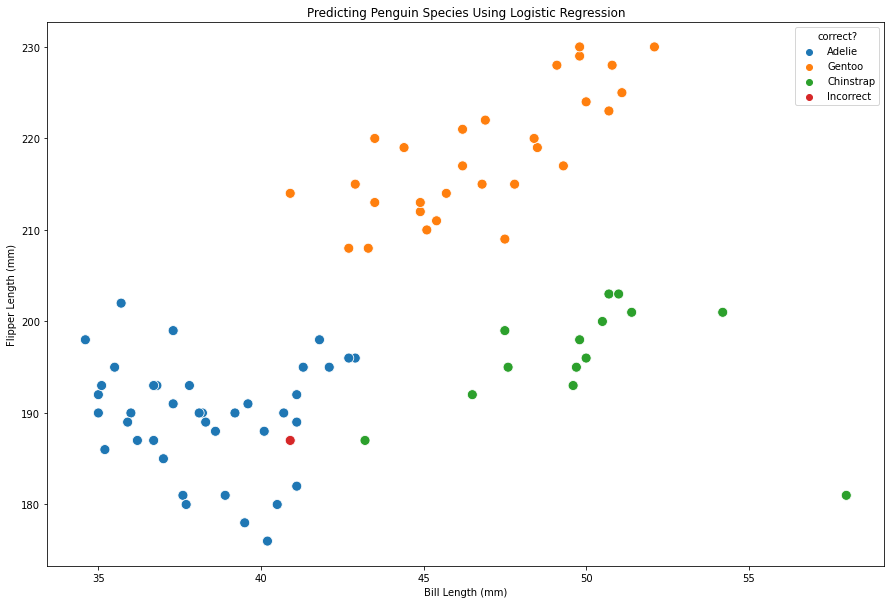

In [224]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Predicting Penguin Species Using Logistic Regression')
# plt.show()
sns.scatterplot(x=X_test_nums['bill_length_mm'], y=X_test_nums['flipper_length_mm'],  hue=y_test['correct?'], s=100)
# sns.scatterplot(X_test_nums['bill_length_mm'], X_test_nums['flipper_length_mm'],  hue=y_test['species'], s=100)

# plt.show()
# plt.savefig('baseline.png',format='png')
plt.savefig("logreg.png")

In [162]:
y_train

321       Gentoo
265       Gentoo
36        Adelie
308       Gentoo
191    Chinstrap
         ...    
194    Chinstrap
77        Adelie
112       Adelie
277       Gentoo
108       Adelie
Name: species, Length: 249, dtype: object

# Messing with SVC

In [152]:
svr = NuSVC(random_state=42)

In [153]:
svr.fit(X_train_nums, y_train)

NuSVC(random_state=42)

In [154]:
svr.score(X_train_nums, y_train)

0.8554216867469879

In [157]:
svr.score(X_test_nums, y_test['species'])

0.8928571428571429

# KNN

In [163]:
knn = KNeighborsClassifier().fit(X_train_nums, y_train)

In [164]:
knn.score(X_train_nums, y_train)

0.8393574297188755

In [165]:
knn.score(X_test_nums, y_test['species'])

0.8571428571428571

In [166]:
y_pred_knn = knn.predict(X_test_nums)

In [170]:
knn_results = y_test['species']
knn_results = pd.DataFrame(knn_results)

In [171]:
knn_results['Preds'] = y_pred_knn

In [172]:
knn_results

,species,Preds
30,Adelie,Chinstrap
317,Gentoo,Gentoo
79,Adelie,Adelie
201,Chinstrap,Chinstrap
63,Adelie,Chinstrap
...,...,...
247,Gentoo,Gentoo
122,Adelie,Adelie
146,Adelie,Adelie
182,Chinstrap,Adelie


In [173]:
knn_results['correct?'] = np.where((knn_results['species'] == knn_results['Preds']), knn_results['Preds'], 'Incorrect')

In [174]:
knn_results

,species,Preds,correct?
30,Adelie,Chinstrap,Incorrect
317,Gentoo,Gentoo,Gentoo
79,Adelie,Adelie,Adelie
201,Chinstrap,Chinstrap,Chinstrap
63,Adelie,Chinstrap,Incorrect
...,...,...,...
247,Gentoo,Gentoo,Gentoo
122,Adelie,Adelie,Adelie
146,Adelie,Adelie,Adelie
182,Chinstrap,Adelie,Incorrect


In [185]:
names_sort = knn_results['correct?'].sort_values().unique()

In [187]:
names_sort

array(['Adelie', 'Chinstrap', 'Gentoo', 'Incorrect'], dtype=object)

C:\Users\nacnu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


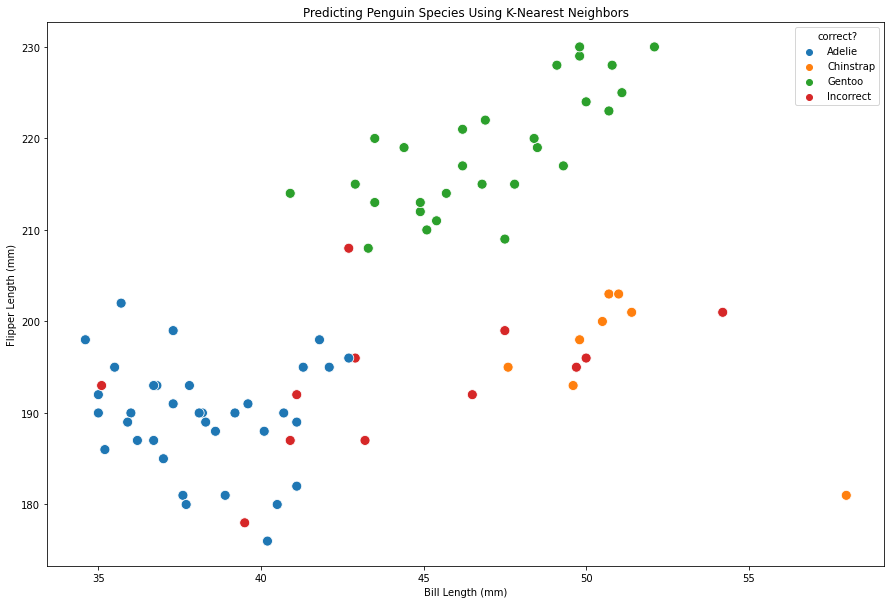

In [188]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Predicting Penguin Species Using K-Nearest Neighbors')
# plt.show()
# sns.scatterplot(x=X_test_nums['bill_length_mm'], y=X_test_nums['flipper_length_mm'],  hue=y_test['correct?'], s=100)
sns.scatterplot(X_test_nums['bill_length_mm'], X_test_nums['flipper_length_mm'],  hue=knn_results['correct?'], hue_order=names_sort, s=100)

# plt.show()
plt.savefig('knn.png',format='png')
# plt.savefig("logreg.png")

# Decision Tree

In [190]:
dtc = DecisionTreeClassifier(random_state=42)

In [191]:
dtc.fit(X_train_nums, y_train)

DecisionTreeClassifier(random_state=42)

In [192]:
dtc.score(X_train_nums, y_train)

1.0

In [193]:
dtc.score(X_test_nums, y_test['species'])

0.9761904761904762

In [194]:
y_pred_dtc = dtc.predict(X_test_nums)

In [195]:
dtc_results = y_test['species']
dtc_results = pd.DataFrame(dtc_results)

In [196]:
dtc_results['Preds'] = y_pred_dtc

In [197]:
dtc_results['correct?'] = np.where((dtc_results['species'] == dtc_results['Preds']), dtc_results['Preds'], 'Incorrect')

In [198]:
dtc_results

,species,Preds,correct?
30,Adelie,Adelie,Adelie
317,Gentoo,Gentoo,Gentoo
79,Adelie,Adelie,Adelie
201,Chinstrap,Chinstrap,Chinstrap
63,Adelie,Adelie,Adelie
...,...,...,...
247,Gentoo,Gentoo,Gentoo
122,Adelie,Adelie,Adelie
146,Adelie,Adelie,Adelie
182,Chinstrap,Adelie,Incorrect


C:\Users\nacnu\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


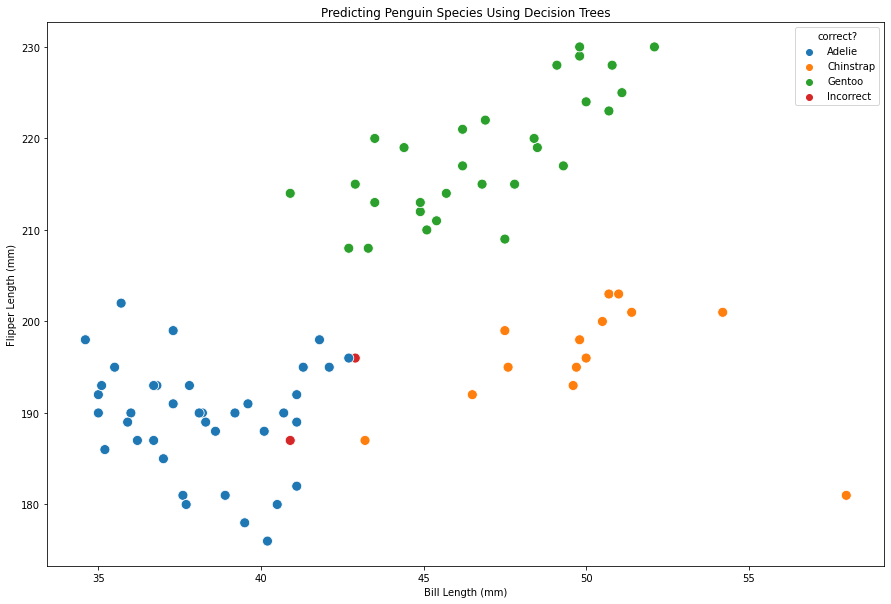

In [226]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Predicting Penguin Species Using Decision Trees')
# plt.show()
# sns.scatterplot(x=X_test_nums['bill_length_mm'], y=X_test_nums['flipper_length_mm'],  hue=y_test['correct?'], s=100)
sns.scatterplot(X_test_nums['bill_length_mm'], X_test_nums['flipper_length_mm'],  hue=dtc_results['correct?'], hue_order=names_sort, s=100)

# plt.show()
plt.savefig('dtc.png',format='png')
# plt.savefig("logreg.png")